In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcdefaults()  

 ## Общая информация 
 


In [99]:
df = pd.read_csv("lamoda_reviews.csv")
df.columns = ["Name", "Description", "Review", "Rating"]
initial_count = len(df)
df = df.drop_duplicates()
duplicates_count = initial_count - len(df)

print(f"Изначально отзывов: {initial_count}")
print(f"Найдено дубликатов: {duplicates_count}")
print(f"После удаления дубликатов: {len(df)}")

Изначально отзывов: 142111
Найдено дубликатов: 28330
После удаления дубликатов: 113781


У нас много дупликатов, но и отзывов под сотню, так что не переживаем. Пьем черничный латте.

## Базовая статистика

In [100]:
stats = {
    "Количество отзывов": len(df),
    "Средняя оценка": df["Rating"].mean(),
    "Медианная оценка": df["Rating"].median(),
    "Средняя длина отзыва (слов)": df["Review"].apply(lambda x: len(str(x).split())).mean()
}
for key, value in stats.items():
    print(f"{key}: {value}")

Количество отзывов: 113781
Средняя оценка: 4.761814362679182
Медианная оценка: 5.0
Средняя длина отзыва (слов): 8.426811154762218


## Распределение отзывов по звездам

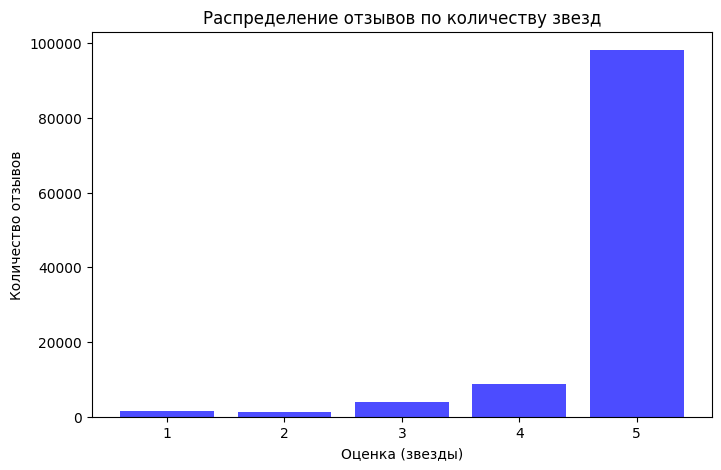

In [101]:
df["Word Count"] = df["Review"].str.split().str.len()
rating_counts = df["Rating"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, color='blue', alpha=0.7)
plt.xlabel("Оценка (звезды)")
plt.ylabel("Количество отзывов")
plt.title("Распределение отзывов по количеству звезд")
plt.xticks(rating_counts.index)

plt.show()


Все предсказуемо и логично, очень много 5-звездочных, остальных сильно меньше(

## Распределение числа слов 

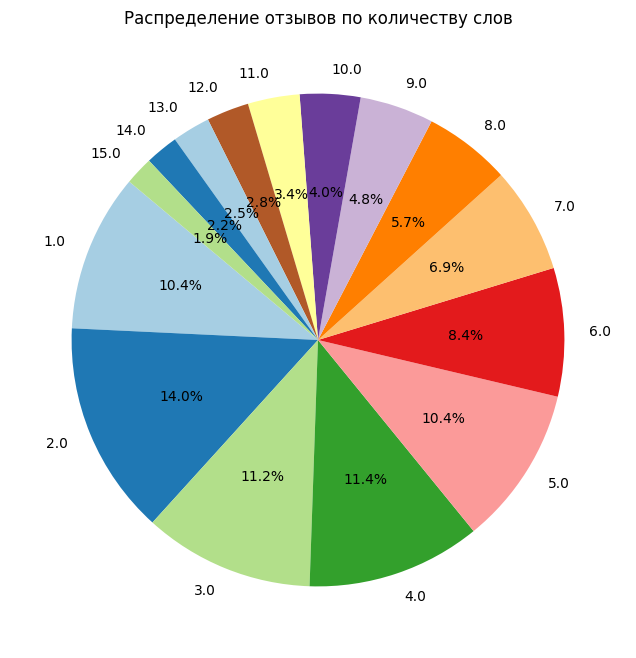

In [102]:
word_count_table = df["Word Count"].value_counts().sort_index().head(15) 

plt.figure(figsize=(8, 8))
plt.pie(word_count_table, labels=word_count_table.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title("Распределение отзывов по количеству слов")

plt.show()

## Самые частые словечки и их корреляции

/var/folders/8_/2209xngj6qz3nh1thpv4hld80000gn/T/ipykernel_54096/2150636074.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Корреляция", y="Слово", data=common_words, palette="viridis")


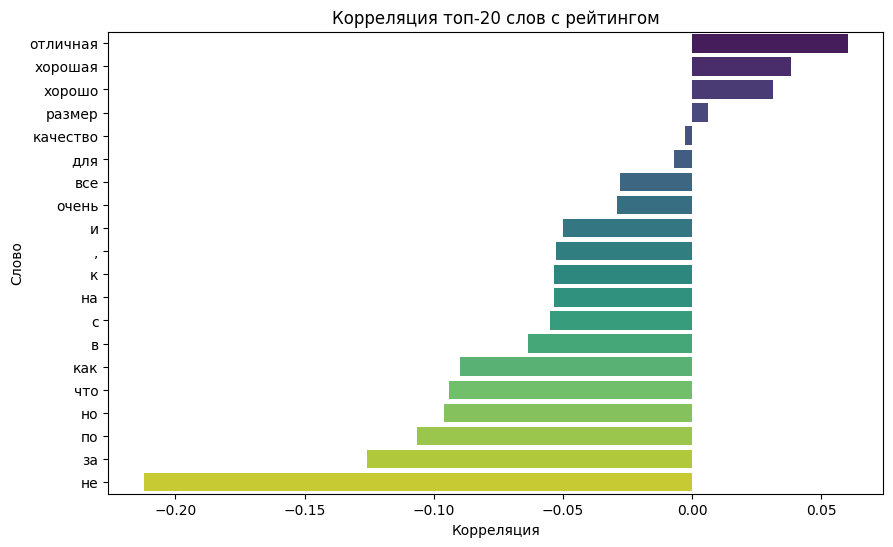

In [103]:
from collections import Counter

df["Review"] = df["Review"].fillna("")

all_words = " ".join(df["Review"]).lower().split()
word_counts = Counter(all_words)
common_words = pd.DataFrame(word_counts.most_common(20), columns=["Слово", "Частота"])

correlations = []

for word in common_words["Слово"]:
    df[word] = df["Review"].str.lower().str.contains(word).astype(int)
    correlation = df[word].corr(df["Rating"])
    correlations.append(correlation)

common_words["Корреляция"] = correlations

common_words = common_words.sort_values(by="Корреляция", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Корреляция", y="Слово", data=common_words, palette="viridis")
plt.title("Корреляция топ-20 слов с рейтингом")
plt.xlabel("Корреляция")
plt.ylabel("Слово")
plt.show()


### Все про биграммы


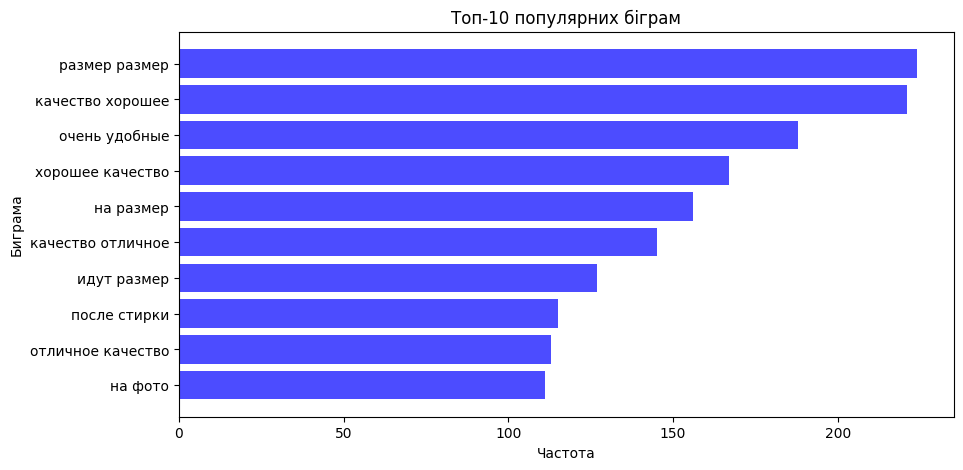

/var/folders/8_/2209xngj6qz3nh1thpv4hld80000gn/T/ipykernel_54096/64927783.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Корреляция", y="Фраза", data=bigram_freq_top20, palette="viridis")


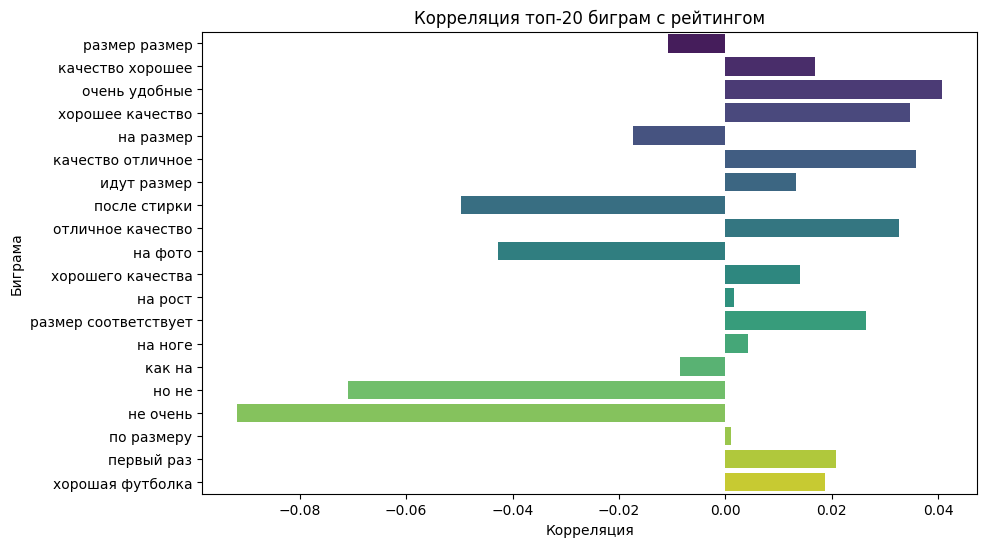

In [104]:
df_sample = df.sample(min(len(df), 10000), random_state=42)

bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words="english", max_features=5000)
X_bigram = bigram_vectorizer.fit_transform(df_sample["Review"])

bigram_freq = pd.DataFrame({
    "Фраза": bigram_vectorizer.get_feature_names_out(),
    "Частота": X_bigram.sum(axis=0).A1
}).sort_values(by="Частота", ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(bigram_freq["Фраза"][:10], bigram_freq["Частота"][:10], color="blue", alpha=0.7)
plt.xlabel("Частота")
plt.ylabel("Биграма")
plt.title("Топ-10 популярних біграм")
plt.gca().invert_yaxis()
plt.show()

bigram_correlations = []
for phrase in bigram_freq["Фраза"][:20]:
    df_sample[phrase] = df_sample["Review"].str.lower().str.contains(phrase).astype(int)
    correlation = df_sample[phrase].corr(df_sample["Rating"])
    bigram_correlations.append(correlation)

bigram_freq_top20 = bigram_freq.head(20).copy()
bigram_freq_top20["Корреляция"] = bigram_correlations

plt.figure(figsize=(10, 6))
sns.barplot(x="Корреляция", y="Фраза", data=bigram_freq_top20, palette="viridis")
plt.title("Корреляция топ-20 биграм с рейтингом")
plt.xlabel("Корреляция")
plt.ylabel("Биграма")
plt.show()

### Все про триграммы


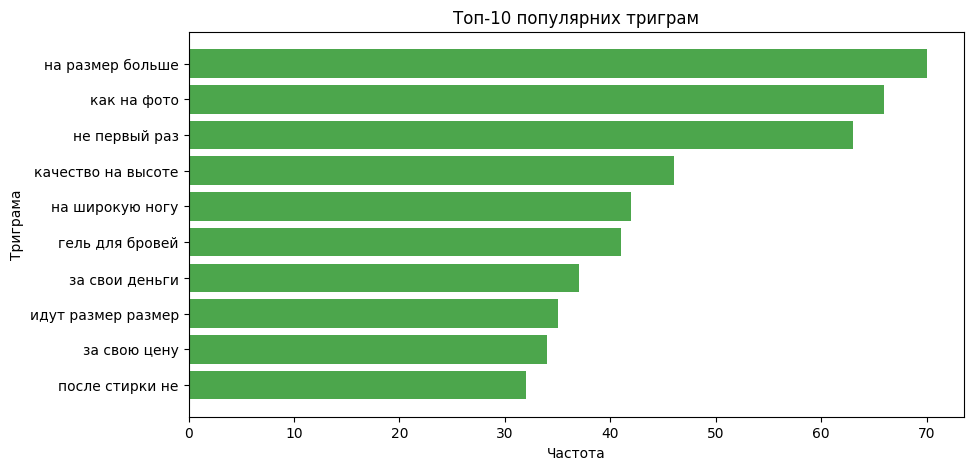

/Users/berdov/ml/myenv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/berdov/ml/myenv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/berdov/ml/myenv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/berdov/ml/myenv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/var/folders/8_/2209xngj6qz3nh1thpv4hld80000gn/T/ipykernel_54096/3589800827.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Корреляция", y="Фраза", data=trigram_freq_top20, pale

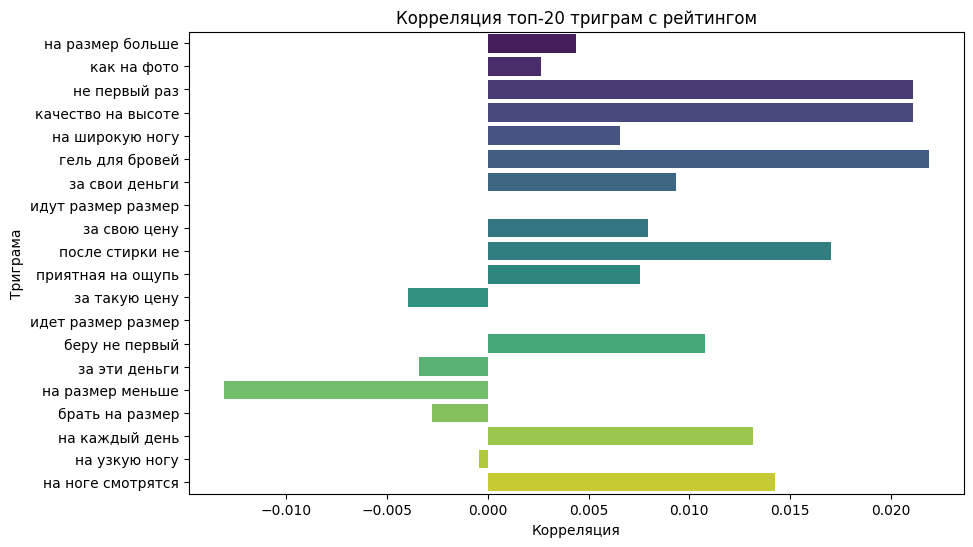

In [105]:
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words="english", max_features=5000)
X_trigram = trigram_vectorizer.fit_transform(df_sample["Review"])

trigram_freq = pd.DataFrame({
    "Фраза": trigram_vectorizer.get_feature_names_out(),
    "Частота": X_trigram.sum(axis=0).A1
}).sort_values(by="Частота", ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(trigram_freq["Фраза"][:10], trigram_freq["Частота"][:10], color="green", alpha=0.7)
plt.xlabel("Частота")
plt.ylabel("Триграма")
plt.title("Топ-10 популярних триграм")
plt.gca().invert_yaxis()
plt.show()

trigram_correlations = []
for phrase in trigram_freq["Фраза"][:20]:
    df_sample[phrase] = df_sample["Review"].str.lower().str.contains(phrase).astype(int)
    correlation = df_sample[phrase].corr(df_sample["Rating"])
    trigram_correlations.append(correlation)

trigram_freq_top20 = trigram_freq.head(20).copy()
trigram_freq_top20["Корреляция"] = trigram_correlations

plt.figure(figsize=(10, 6))
sns.barplot(x="Корреляция", y="Фраза", data=trigram_freq_top20, palette="viridis")
plt.title("Корреляция топ-20 триграм с рейтингом")
plt.xlabel("Корреляция")
plt.ylabel("Триграма")
plt.show()

## Модное облако

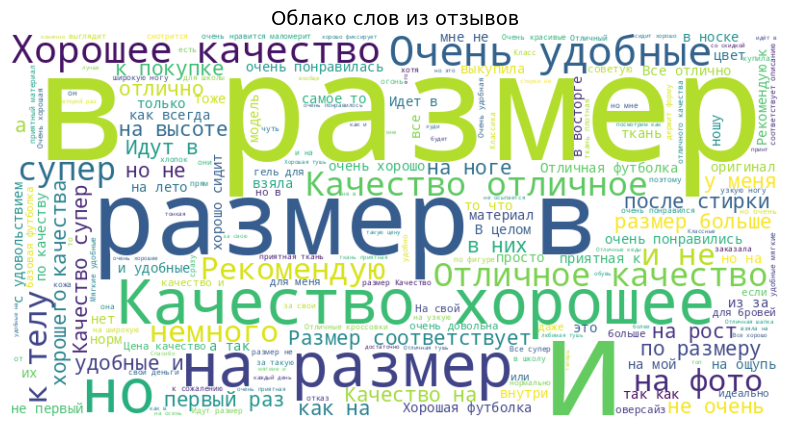

In [106]:
from wordcloud import WordCloud

text = " ".join(str(review) for review in df["Review"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis", max_words=200).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.title("Облако слов из отзывов", fontsize=14)
plt.show()

## Частые фразы из 2-3 слов

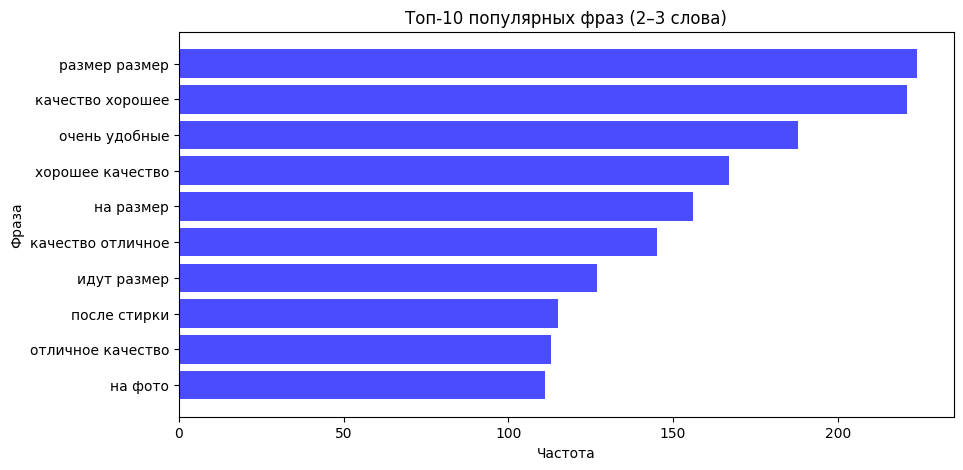

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

df_sample = df.sample(min(len(df), 10000), random_state=42)
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df_sample["Review"])
phrases_freq = pd.DataFrame({
    "Фраза": vectorizer.get_feature_names_out(),
    "Частота": X.sum(axis=0).A1 
}).sort_values(by="Частота", ascending=False)
plt.figure(figsize=(10, 5))
plt.barh(phrases_freq["Фраза"][:10], phrases_freq["Частота"][:10], color="blue", alpha=0.7)
plt.xlabel("Частота")
plt.ylabel("Фраза")
plt.title("Топ-10 популярных фраз (2–3 слова)")
plt.gca().invert_yaxis() 
plt.show()

## Базовые корреляции

Корреляция длины отзыва с оценкой: -0.1785


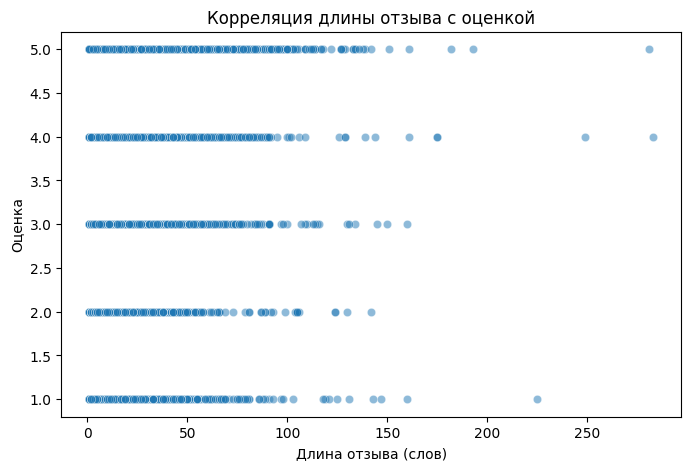

In [108]:
df = pd.read_csv("lamoda_reviews.csv")
df.columns = ["Name", "Description", "Review", "Rating"]

df = df.drop_duplicates()
df = df.dropna(subset=["Review", "Rating"])  

df["Review"] = df["Review"].astype(str)
df["Review_Length"] = df["Review"].apply(lambda x: len(x.split()))
df["Rating"] = pd.to_numeric(df["Rating"], errors='coerce')

correlation = df["Review_Length"].corr(df["Rating"])
print(f"Корреляция длины отзыва с оценкой: {correlation:.4f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Review_Length"], y=df["Rating"], alpha=0.5)
plt.xlabel("Длина отзыва (слов)")
plt.ylabel("Оценка")
plt.title("Корреляция длины отзыва с оценкой")
plt.show()

/var/folders/8_/2209xngj6qz3nh1thpv4hld80000gn/T/ipykernel_54096/2480067863.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Emojis"].fillna("", inplace=True)


Топ-10 корреляций с рейтингом:
тушь         0.014392
не           0.011886
шапка        0.011463
цвет         0.010895
что          0.008516
на           0.007947
удобные      0.007323
смотрится    0.006836
отличная     0.006694
кроссовки    0.006378
Name: Rating, dtype: float64


/var/folders/8_/2209xngj6qz3nh1thpv4hld80000gn/T/ipykernel_54096/2480067863.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_corr.head(10).index, y=filtered_corr.head(10).values, palette="coolwarm")


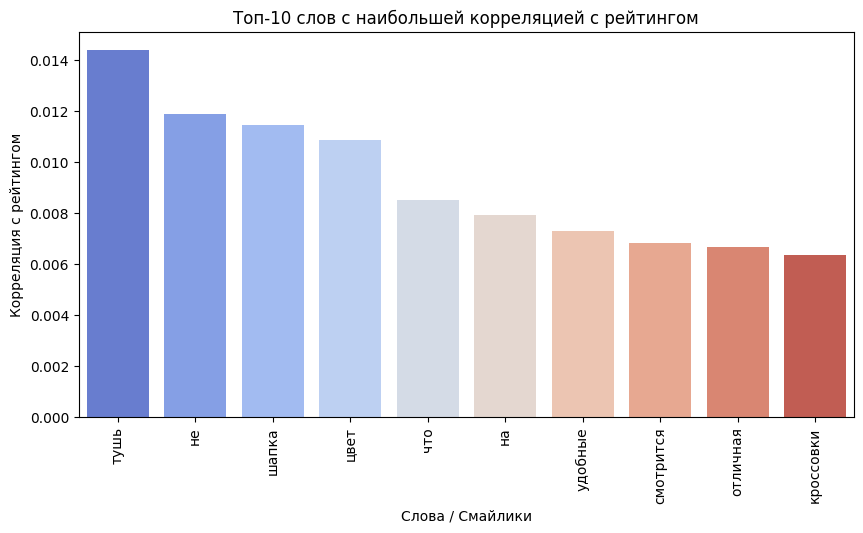

In [ ]:
import emoji
import re


df = pd.read_csv("lamoda_reviews.csv")
df.columns = ["Name", "Description", "Review", "Rating"]
df = df.drop_duplicates()
df = df.dropna(subset=["Review", "Rating"])  
df["Review"] = df["Review"].astype(str)
df["Rating"] = pd.to_numeric(df["Rating"], errors='coerce')

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

df["Emojis"] = df["Review"].apply(extract_emojis)
df["Emojis"].fillna("", inplace=True)
vectorizer = CountVectorizer(
    ngram_range=(1, 1),
    stop_words="english",
    max_features=50
)
X = vectorizer.fit_transform(df["Review"])
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, word_freq_df], axis=1)
emoji_vectorizer = CountVectorizer(token_pattern=r".", max_features=20)
X_emoji = emoji_vectorizer.fit_transform(df["Emojis"].astype(str))
emoji_freq_df = pd.DataFrame(X_emoji.toarray(), columns=emoji_vectorizer.get_feature_names_out())
df = pd.concat([df, emoji_freq_df], axis=1)
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()["Rating"].dropna().sort_values(ascending=False)
corr_matrix = corr_matrix.drop("Rating", errors="ignore")
filtered_corr = corr_matrix[~corr_matrix.index.str.match(r"^[a-zA-Zа-яА-Я]$")]
print("Топ-10 корреляций с рейтингом:")
print(filtered_corr.head(10))
plt.figure(figsize=(10, 5))
sns.barplot(x=filtered_corr.head(10).index, y=filtered_corr.head(10).values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Смайлики")
plt.ylabel("Корреляция с рейтингом")
plt.title("Топ-10 слов с наибольшей корреляцией с рейтингом")
plt.show()

## А какие слова популярнее всего для каких оценок?

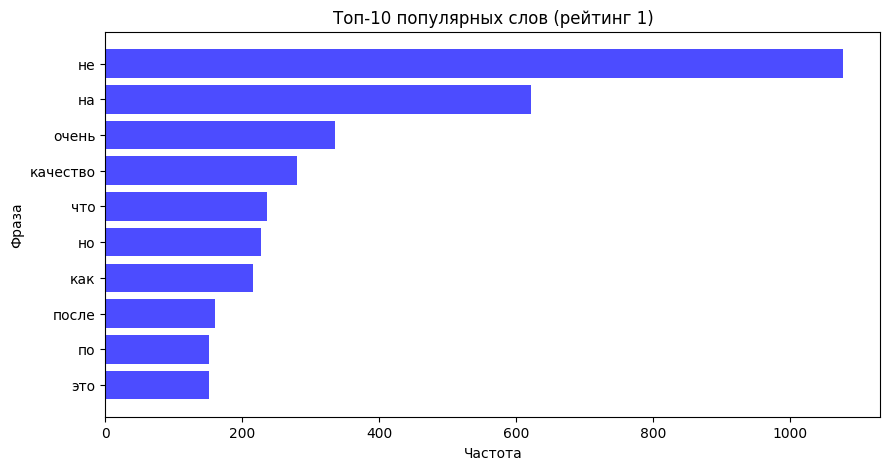

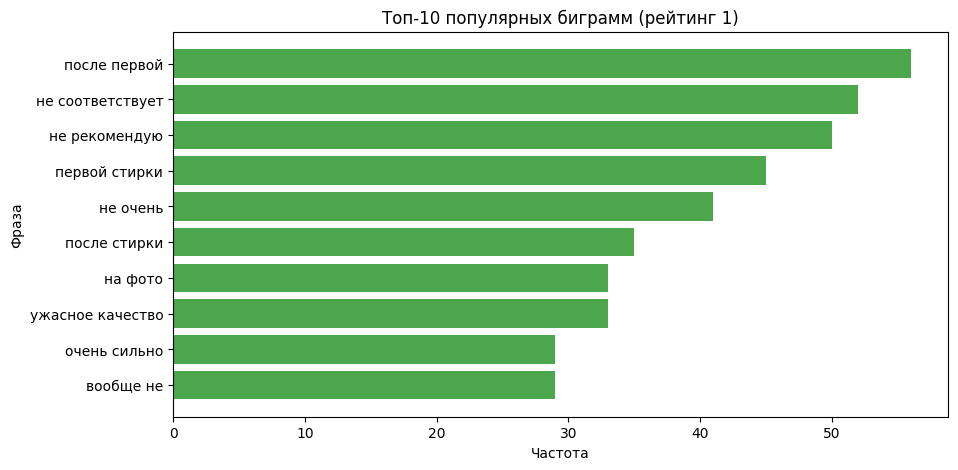

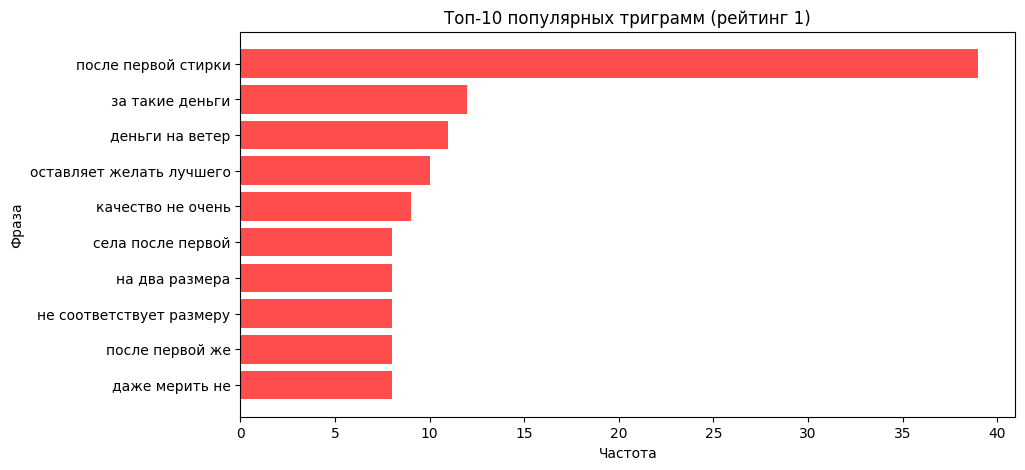

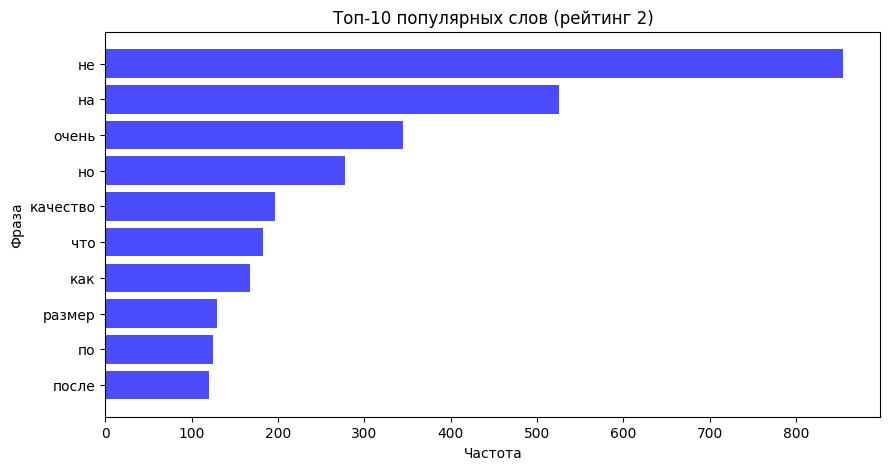

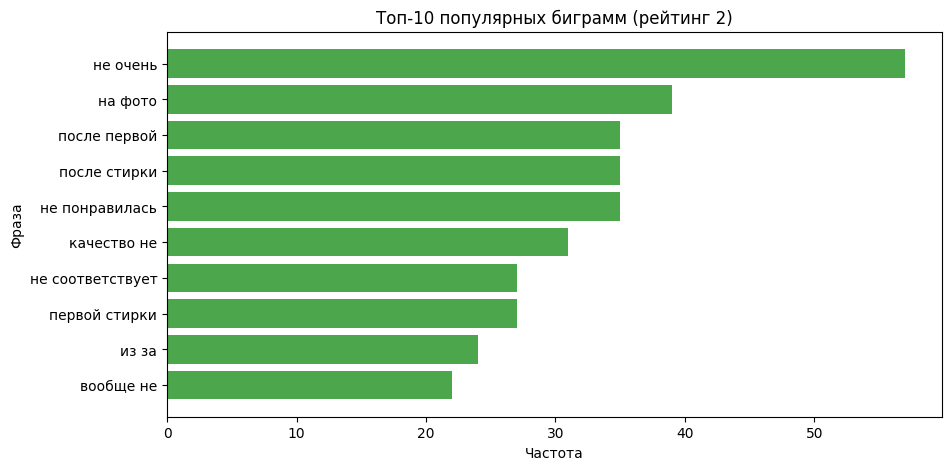

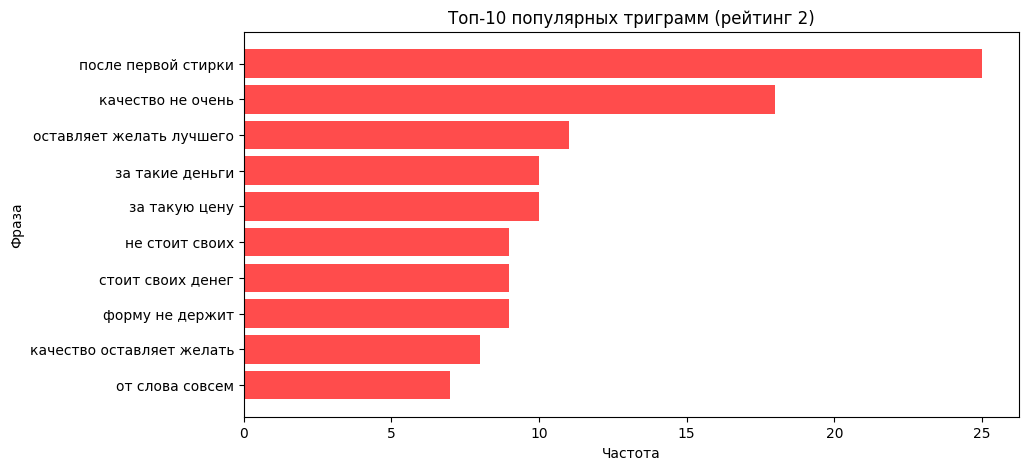

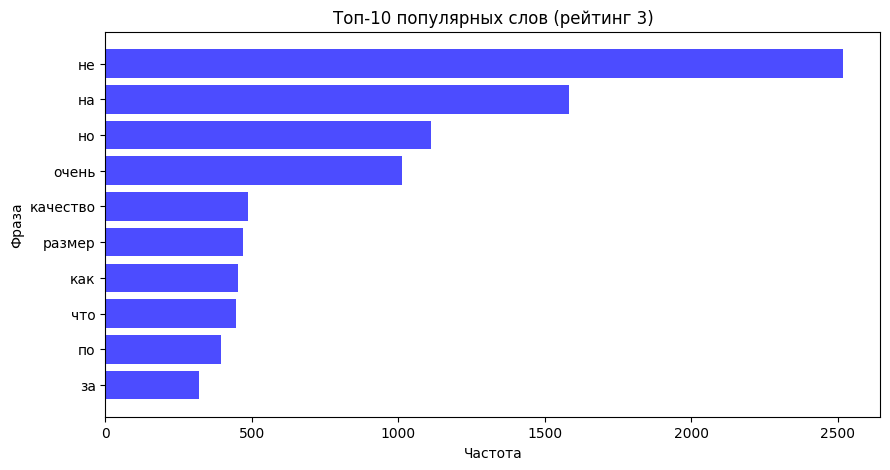

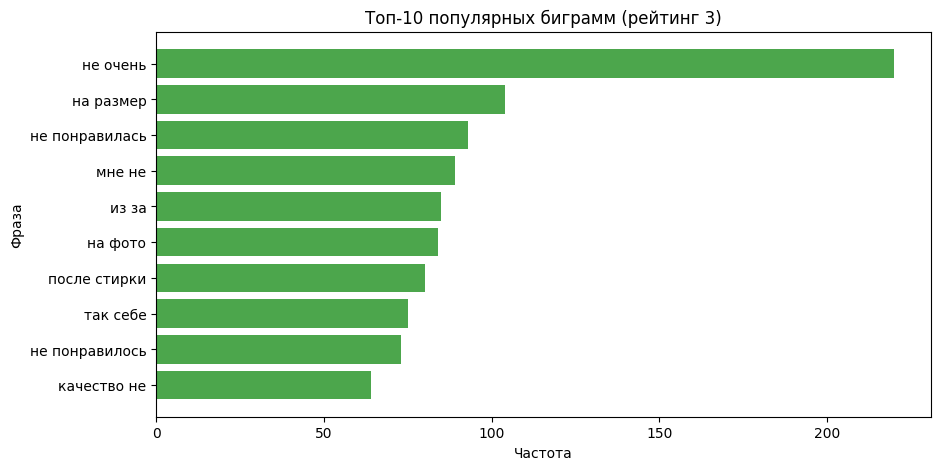

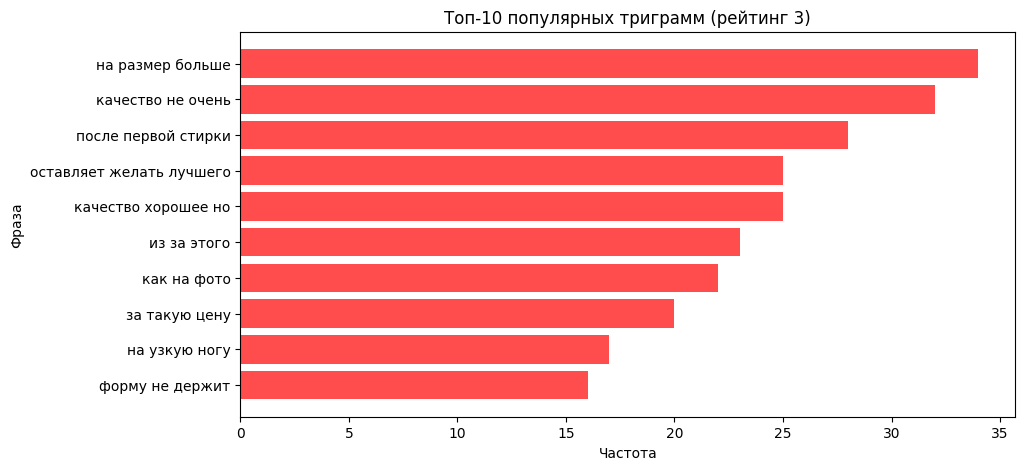

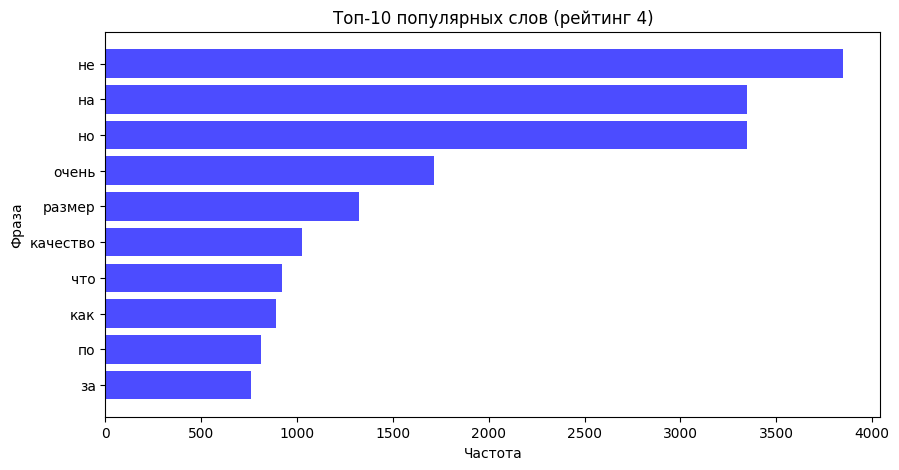

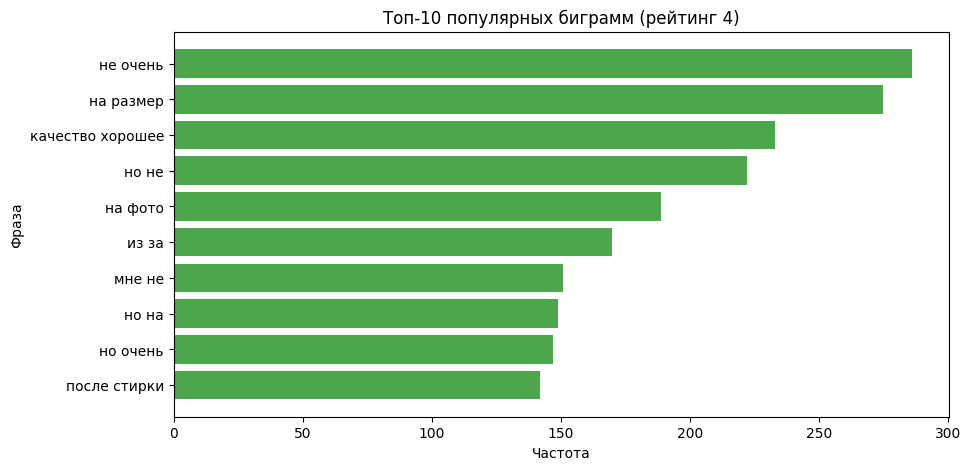

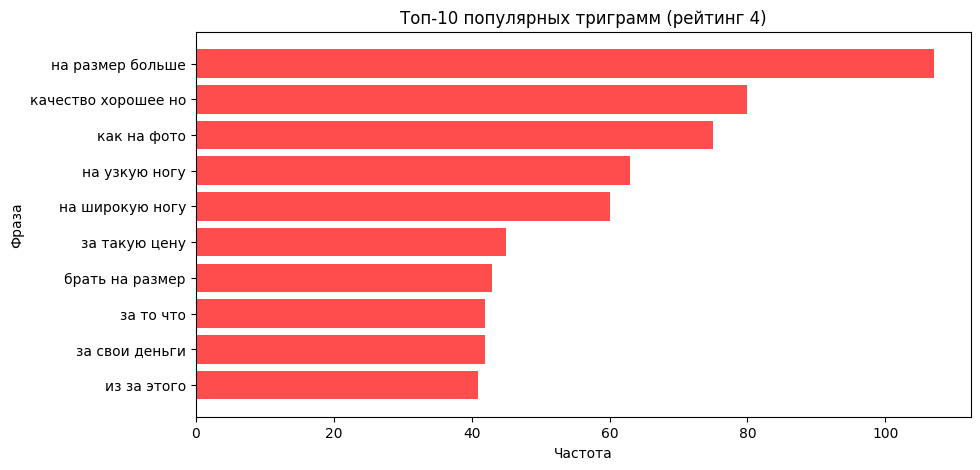

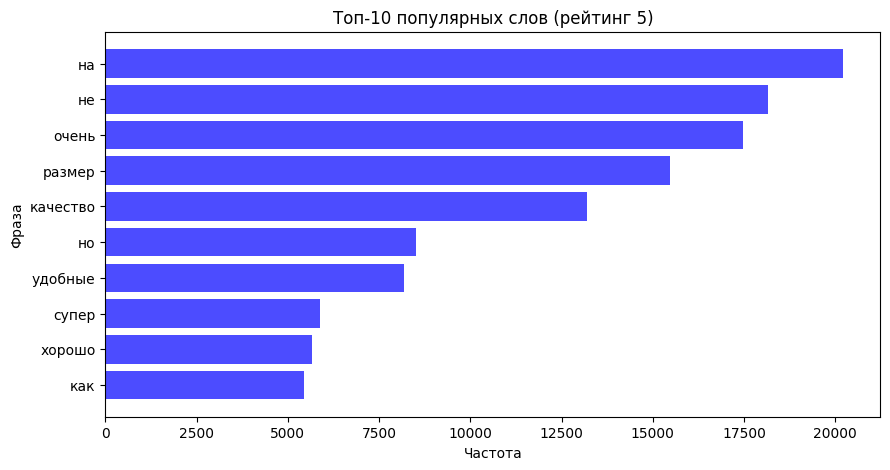

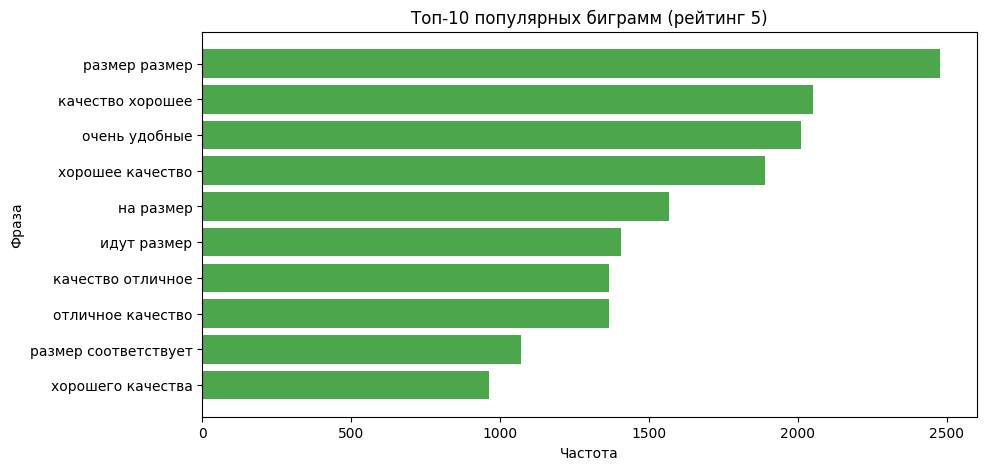

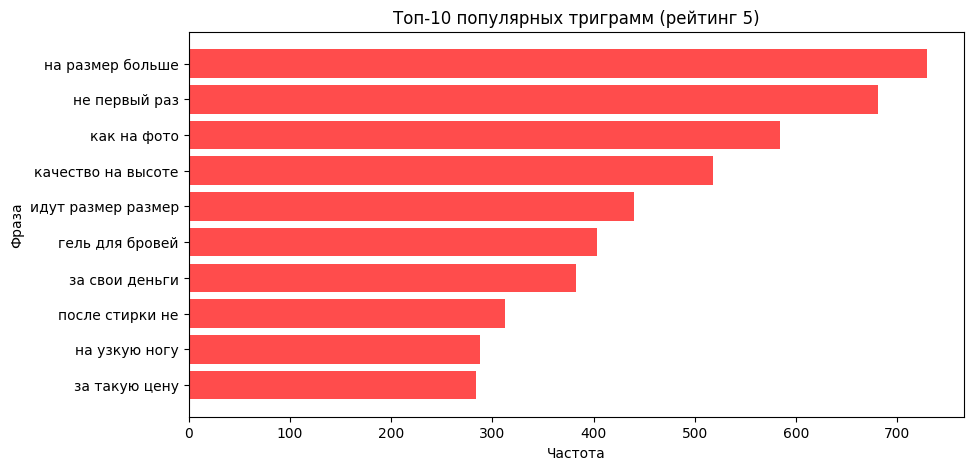

In [110]:
def plot_top_phrases(data, title, color, ngram_range, top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words="english", max_features=5000)
    X = vectorizer.fit_transform(data["Review"])
    phrases_freq = pd.DataFrame({
        "Фраза": vectorizer.get_feature_names_out(),
        "Частота": X.sum(axis=0).A1
    }).sort_values(by="Частота", ascending=False)
    plt.figure(figsize=(10, 5))
    plt.barh(phrases_freq["Фраза"][:top_n], phrases_freq["Частота"][:top_n], color=color, alpha=0.7)
    plt.xlabel("Частота")
    plt.ylabel("Фраза")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

for rating in range(1, 6):
    df_filtered = df[df["Rating"] == rating]
    plot_top_phrases(
        df_filtered,
        title=f"Топ-10 популярных слов (рейтинг {rating})",
        color="blue",
        ngram_range=(1, 1)
    )
    plot_top_phrases(
        df_filtered,
        title=f"Топ-10 популярных биграмм (рейтинг {rating})",
        color="green",
        ngram_range=(2, 2)
    )
    plot_top_phrases(
        df_filtered,
        title=f"Топ-10 популярных триграмм (рейтинг {rating})",
        color="red",
        ngram_range=(3, 3)
    )

## Смайлики

/var/folders/8_/2209xngj6qz3nh1thpv4hld80000gn/T/ipykernel_54096/160242726.py:47: UserWarning: Glyph 108 (l) missing from font(s) Noto Emoji.
  plt.tight_layout()
/var/folders/8_/2209xngj6qz3nh1thpv4hld80000gn/T/ipykernel_54096/160242726.py:47: UserWarning: Glyph 112 (p) missing from font(s) Noto Emoji.
  plt.tight_layout()
/Users/berdov/ml/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Emoji.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/berdov/ml/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Noto Emoji.
  fig.canvas.print_figure(bytes_io, **kw)


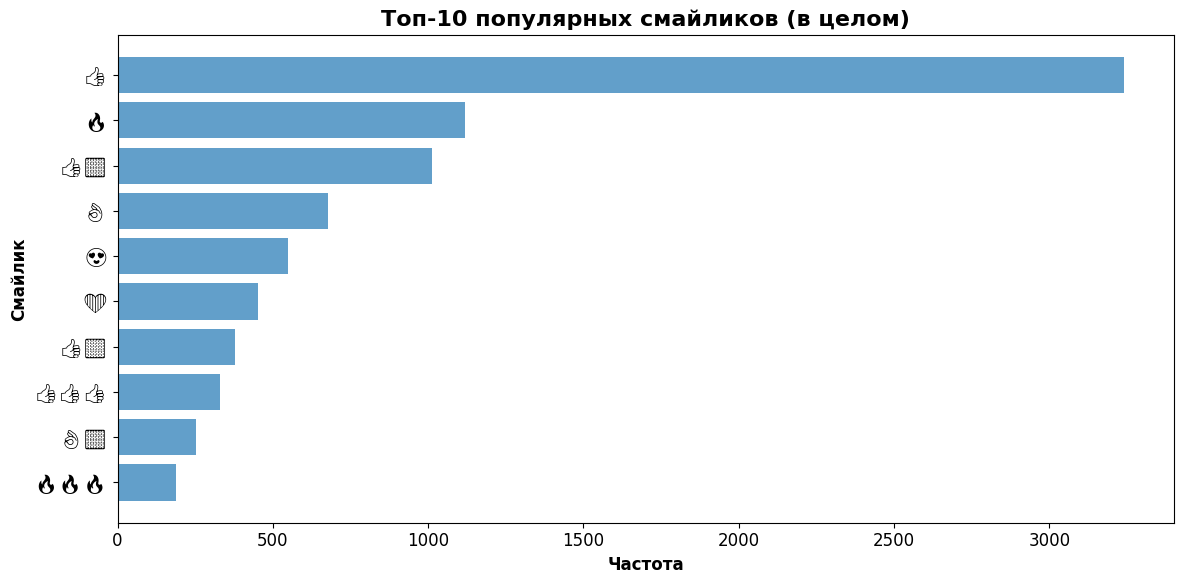

/var/folders/8_/2209xngj6qz3nh1thpv4hld80000gn/T/ipykernel_54096/160242726.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Корреляция", y="Смайлик", data=corr_df, palette="viridis", ax=ax)
/var/folders/8_/2209xngj6qz3nh1thpv4hld80000gn/T/ipykernel_54096/160242726.py:81: UserWarning: Glyph 108 (l) missing from font(s) Noto Emoji.
  plt.tight_layout()
/var/folders/8_/2209xngj6qz3nh1thpv4hld80000gn/T/ipykernel_54096/160242726.py:81: UserWarning: Glyph 112 (p) missing from font(s) Noto Emoji.
  plt.tight_layout()
/Users/berdov/ml/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Emoji.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/berdov/ml/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Noto Emo

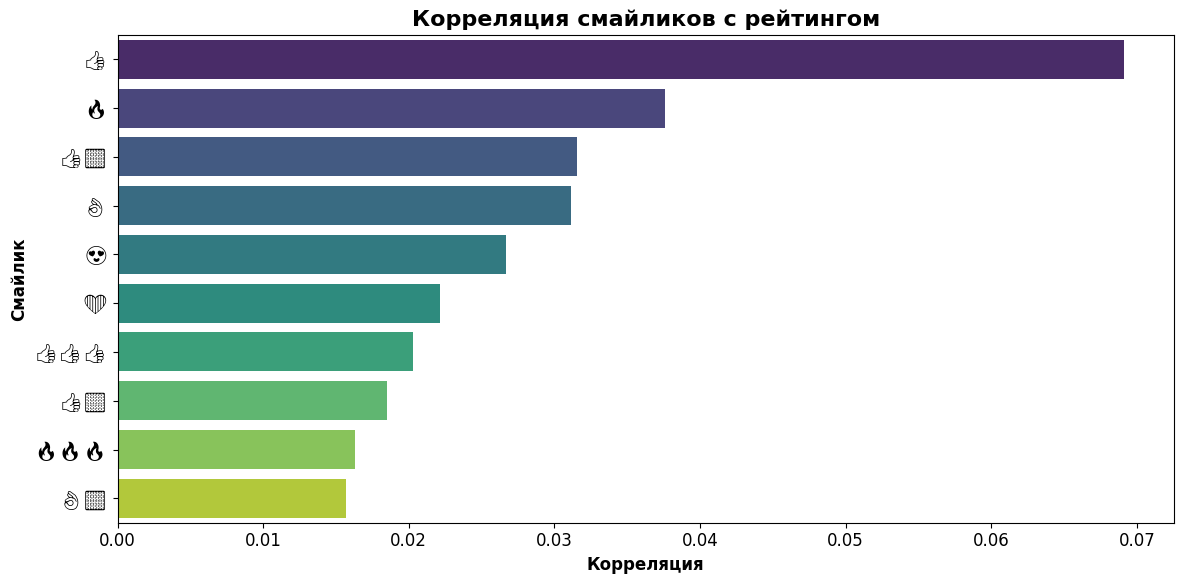

In [111]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
emoji_font_path = "/Users/berdov/Library/Fonts/NotoEmoji[wght].ttf" 
emoji_font = fm.FontProperties(fname=emoji_font_path)

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelweight": "bold"
})

def extract_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  
        "\U0001F300-\U0001F5FF"  
        "\U0001F680-\U0001F6FF"  
        "\U0001F700-\U0001F77F"  
        "\U0001F780-\U0001F7FF"  
        "\U0001F800-\U0001F8FF"  
        "\U0001F900-\U0001F9FF"  
        "\U0001FA00-\U0001FA6F"  
        "\U0001FA70-\U0001FAFF"  
        "\U00002702-\U000027B0"  
        "\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    return emoji_pattern.findall(str(text))

def plot_top_emojis(data, title, top_n=10):
    all_emojis = [emoji for text in data["Review"] for emoji in extract_emojis(text)]
    emoji_counts = pd.Series(all_emojis).value_counts().head(top_n)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.barh(emoji_counts.index, emoji_counts.values, alpha=0.7)
    for label in ax.get_yticklabels():
        label.set_fontproperties(emoji_font)
        label.set_fontsize(14)
    
    ax.set_xlabel("Частота", fontweight="bold")
    ax.set_ylabel("Смайлик", fontweight="bold")
    ax.set_title(title, fontsize=16)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

def calculate_emoji_correlations(data, top_n=10):
    all_emojis = [emoji for text in data["Review"] for emoji in extract_emojis(text)]
    emoji_counts = pd.Series(all_emojis).value_counts().head(top_n)
    
    correlations = []
    for emoji in emoji_counts.index:
        data[emoji] = data["Review"].apply(lambda x: int(emoji in str(x)))
        correlation = data[emoji].corr(data["Rating"])
        correlations.append(correlation)
    
    return pd.DataFrame({
        "Смайлик": emoji_counts.index,
        "Корреляция": correlations
    }).sort_values(by="Корреляция", ascending=False)


plot_top_emojis(df, "Топ-10 популярных смайликов (в целом)")

corr_df = calculate_emoji_correlations(df)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="Корреляция", y="Смайлик", data=corr_df, palette="viridis", ax=ax)


for label in ax.get_yticklabels():
    label.set_fontproperties(emoji_font)
    label.set_fontsize(14)

ax.set_title("Корреляция смайликов с рейтингом", fontsize=16, fontweight="bold")
ax.set_xlabel("Корреляция", fontweight="bold")
ax.set_ylabel("Смайлик", fontweight="bold")
plt.tight_layout()
plt.show()
plt.rcdefaults()  




## Выводы

В целом -- вообще ничего удивительного, кроме того что слово тушь имеет наибольшую корреляцию с рейтингом. Никогда бы не подумал что на моих данных это так. Длина отзыва также не особо влияет, да и конкретные слова на самом деле тоже. Но! биграммы и триграммы существенно спасли ситуацию, оказалось очень много сильнокоррелируемых выражений и смайликов. На них и стоит обратить внимание. 
